# Multiple Regression

Let's grab a small little data set of Blue Book car values:

In [1]:
import pandas as pd

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


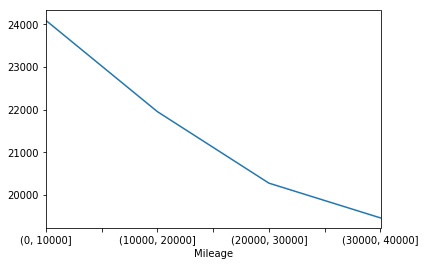

In [2]:
%matplotlib inline
import numpy as np
df1=df[['Mileage','Price']]
bins =  np.arange(0,50000,10000)
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()
print(groups.head())
groups['Price'].plot.line()


We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Note how we are avoiding the make and model; regressions don't work well with ordinal values, unless you can convert them into some numerical order that makes sense somehow.

Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [3]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

print (X)

est = sm.OLS(y, X).fit()

est.summary()

      Mileage  Cylinder     Doors
0   -1.417485   0.52741  0.556279
1   -1.305902   0.52741  0.556279
2   -0.810128   0.52741  0.556279
3   -0.426058   0.52741  0.556279
4    0.000008   0.52741  0.556279
..        ...       ...       ...
799 -0.439853   0.52741  0.556279
800 -0.089966   0.52741  0.556279
801  0.079605   0.52741  0.556279
802  0.750446   0.52741  0.556279
803  1.932565   0.52741  0.556279

[804 rows x 3 columns]


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.11
Date:                Thu, 02 Apr 2020   Prob (F-statistic):                    2.23e-11
Time:                        08:11:25   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.843e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The table of coefficients above gives us the values to plug into an equation of form:
    B0 + B1 * Mileage + B2 * cylinders + B3 * doors
    
In this example, it's pretty clear that the number of cylinders is more important than anything based on the coefficients.

Could we have figured that out earlier?

In [4]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Surprisingly, more doors does not mean a higher price! (Maybe it implies a sport car in some cases?) So it's not surprising that it's pretty useless as a predictor here. This is a very small data set however, so we can't really read much meaning into it.

How would you use this to make an actual prediction? Start by scaling your multiple feature variables into the same scale used to train the model, then just call est.predict() on the scaled features:

In [5]:
scaled = scale.transform([[45000, 8, 4]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)

[[3.07256589 1.96971667 0.55627894]]
[6315.01330583]


## Activity

Mess around with the fake input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it - why stop at 4 doors?

In [8]:
import pandas as pd
import numpy as np
#Load the data set and repalce the empty rows for NaN valeu
data = pd.read_csv('C:\\Users\\Diego Alves\\Desktop\\Data_sets\\kc_house_data.csv',header=0,encoding = 'unicode_escape')

In [9]:
data.head

<bound method DataFrame.head of                id             date      price  bedrooms  bathrooms  \
0      7129300520  20141013T000000   221900.0         3       1.00   
1      6414100192  20141209T000000   538000.0         3       2.25   
2      5631500400  20150225T000000   180000.0         2       1.00   
3      2487200875  20141209T000000   604000.0         4       3.00   
4      1954400510  20150218T000000   510000.0         3       2.00   
5      7237550310  20140512T000000  1230000.0         4       4.50   
6      1321400060  20140627T000000   257500.0         3       2.25   
7      2008000270  20150115T000000   291850.0         3       1.50   
8      2414600126  20150415T000000   229500.0         3       1.00   
9      3793500160  20150312T000000   323000.0         3       2.50   
10     1736800520  20150403T000000   662500.0         3       2.50   
11     9212900260  20140527T000000   468000.0         2       1.00   
12      114101516  20140528T000000   310000.0         3   

                    sqft_lot          price
sqft_lot                                   
(0, 10000]       6041.677718  494386.902415
(10000, 20000]  13115.849404  618115.657335
(20000, 30000]  23888.491200  802140.355200


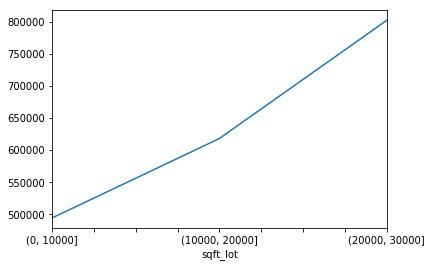

In [24]:
%matplotlib inline
import numpy as np
df1=data[['sqft_lot','price']]
bins =  np.arange(0,40000,10000)
groups = df1.groupby(pd.cut(df1['sqft_lot'],bins)).mean()
print(groups.head())
groups['price'].plot.line()

In [26]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = data[['sqft_living', 'sqft_lot', 'bedrooms']]
y = data['price']

X[['sqft_living', 'sqft_lot', 'bedrooms']] = scale.fit_transform(X[['sqft_living', 'sqft_lot', 'bedrooms']].values)

print (X)

est = sm.OLS(y, X).fit()

est.summary()

C:\Users\Diego Alves\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Diego Alves\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Diego Alves\Anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


       sqft_living  sqft_lot  bedrooms
0        -0.979835 -0.228321 -0.398737
1         0.533634 -0.189885 -0.398737
2        -1.426254 -0.123298 -1.473959
3        -0.130550 -0.244014  0.676485
4        -0.435422 -0.169653 -0.398737
5         3.636791  2.096185  0.676485
6        -0.397313 -0.200098 -0.398737
7        -1.110494 -0.130276 -0.398737
8        -0.326539 -0.184381 -0.398737
9        -0.206768 -0.206351 -0.398737
10        1.611573 -0.128224 -0.398737
11       -1.001612 -0.219871 -1.473959
12       -0.707628  0.115743 -0.398737
13       -0.772958 -0.131024 -0.398737
14       -0.293874 -0.247636  1.751707
15        0.947389 -0.244014  0.676485
16       -0.206768 -0.025760 -0.398737
17       -0.522528 -0.260915  0.676485
18       -0.958058 -0.126920 -1.473959
19       -0.903617 -0.128755 -0.398737
20       -0.500751 -0.244497  0.676485
21        1.056271  0.718502 -0.398737
22        0.206986 -0.212628  1.751707
23       -1.099606 -0.131918 -1.473959
24        0.402975 -0.207

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.161
Model:                            OLS   Adj. R-squared (uncentered):              0.161
Method:                 Least Squares   F-statistic:                              1381.
Date:                Sat, 30 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:27:53   Log-Likelihood:                     -3.1816e+05
No. Observations:               21613   AIC:                                  6.363e+05
Df Residuals:                   21610   BIC:                                  6.364e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living  2.922e+05   5074.481     57.581      0.000    2.82e+05    3.02e+05
sqft_lot    -1.583e+04   4147.818     -3.816      0.000    -2.4e+04   -7698.423
bedrooms    -5.473e+04   5000.636    -10.944      0.000   -6.45e+04   -4.49e+04
==============================================================================
Omnibus:                    14323.294   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           478827.974
Skew:                           2.711   Prob(JB):                         0.00
Kurtosis:                      25.412   Cond. No.                         1.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
y.groupby(data.bedrooms).mean()

bedrooms
0     4.102231e+05
1     3.176580e+05
2     4.013877e+05
3     4.662766e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

In [28]:
scaled = scale.transform([[770, 10000, 2]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)

[[-1.42625404 -0.12329847 -1.47395936]]
[-334123.74607818]
